Initiliase les lignes et regarde les titres les plus récurrents

In [ ]:
import matplotlib.pyplot as plt

with open("../fichier_sans_lignes_vides.txt", "r", encoding="utf8") as f:
    lines = f.readlines()

lines = [line.strip() for line in lines if line.strip()]

d_title = {}
for i in range(len(lines)):
    if lines[i][0:5] == "<text":
        p = ""
        boo = False
        for j in range(len(lines[i])):
            if lines[i][j-7:j] == 'title="':
                boo = True
            if lines[i][j] == '"':
                boo = False
            if boo != False:
                p += lines[i][j]
        if p in d_title:  #ajoute dans un dictionnaire le thème et son itération correspondante dans une liste
            d_title[p].append(i)
        else:
            d_title[p] = [i]
    if i > 50:
        break 
# print(d_title)

# for elt in d_title:
#     if len(d_title[elt]) > 1:
#         print(elt,"---",len(d_title[elt]))  
#affiche le nombre de thèmes qui apparaisse + de 2 fois, et c'est souvent 2 fois max donc pas fou de faire une analyse sur les thèmes sauf si on les généralise mais c'est risqué sur des questions précises
# pas concluant

Regarde les questions et les mets dans un dictionnaire en fonction d'un département

In [ ]:
# d_dept_quest = {}
# for i in range(len(lines)):
#     if lines[i][0:5] == "<text":
#         p = ""
#         boo = False
#         for j in range(len(lines[i])):
#             # if lines[i][j-12:j] == 'department="': #par nom de departement
#             # if lines[i][j-8:j] == 'region="':  #par region
#             if lines[i][j-15:j] == 'departmentiso="':  #par numéro de departement
#                 boo = True
#             if lines[i][j] == '"':
#                 boo = False
#             if boo != False:
#                 p += lines[i][j]
#         if p in d_dept_quest:  #ajoute dans un dictionnaire le thème et son itération correspondante dans une liste
#             # print(lines[i])
#             d_dept_quest[p].append(lines[i])
#         else:
#             d_dept_quest[p] = [lines[i]]
    # if i > 100:
    #     break

   # for elt in d_dept_quest:
#     d_dept_quest[elt] = len(d_dept_quest[elt])
#     print(elt,"---",d_dept_quest[elt]) 
# print("\n\n")

La même chose en faisant les réponses

In [ ]:
d_dept_rep = {}
for i in range(len(lines)):
    if lines[i][0:5] == "<text":
        p = ""
        boo = False
        for j in range(len(lines[i])):
            # if lines[i][j-12:j] == 'department="': #par nom de departement
            # if lines[i][j-8:j] == 'region="':  #par region
            if lines[i][j-15:j] == 'departmentiso="':  #par numéro de departement
                boo = True
            if lines[i][j] == '"':
                boo = False
            if boo != False:
                p += lines[i][j]
    else:
        if lines[i] != "</text>":
            if p in d_dept_rep:  #ajoute dans un dictionnaire le thème et son itération correspondante dans une liste
                # print(lines[i])
                d_dept_rep[p].append(lines[i])
            else:
                d_dept_rep[p] = [lines[i]]
    # if i > 10000:
    #     break

list_dep = ["FR-09","FR-11","FR-12","FR-30","FR-31","FR-32","FR-34","FR-46","FR-48","FR-65","FR-66","FR-81","FR-82"]
for cle in list(d_dept_rep.keys()):
    if cle not in list_dep:
        del d_dept_rep[cle]
# for elt in d_dept_rep:
#     d_dept_rep[elt] = len(d_dept_rep[elt])
#     print(elt,"---",d_dept_rep[elt]) 
#par départment c'est déjà mieux (données sur 100 départements)

#trier de manière décroissante
sorted_d = dict(sorted(d_dept_rep.items(), key=lambda x: len(x[1]), reverse=True))

In [ ]:
def rep_dep(num_dep):
    return sorted_d["FR-"+str(num_dep)]

# print(rep_dep(34))

- Par thèmes: on prend le fichier contenant toutes les réponses pour chaque département et on regarde le thème associé à ces réponses et on fait ça pour chaque département. Et ensuite on compare avec les 10 mots les plus utilisés pour chaque département et on regarde si c'est similaire.

- Par dépendance: on prend le fichier contenant les réponses possédant au moins un des 10 mots les plus utilsés dans le département. Puis on prend un mot clé en particulier (ex:impôt) et on regarde tous les mots qui dépendent de celui-ci. On fait ça pour toutes les réponses du fichier et on crée un nuage de mots pour chaque département avec au centre le mot clé et autour les mots qui en dépendent où leur grosseur varie en fonction du nombre de fois qu'il apparaît 

In [1]:
import spacy
from spacy import displacy
import json

nlp = spacy.load('fr_core_news_md')

# Ouvrir le fichier JSON en mode lecture
with open('filtered_Dep.json', 'r') as f:
    # Charger le contenu du fichier JSON
    data = json.load(f)

# Définir le mot à chercher
list_dep = ["FR-09","FR-11","FR-12","FR-30","FR-31","FR-32","FR-34","FR-46","FR-48","FR-65","FR-66","FR-81","FR-82"]
bad_word = ["-", ",", "(", ")", "!", ":", "'", ";", "%"]
mot_defini = "impôt"

d_word = {}
# d_word_09 = {}
# d_word_11 = {}
# d_word_12 = {}
# d_word_30 = {}
# d_word_31 = {}
# d_word_32 = {}
# d_word_34 = {}
# d_word_46 = {}
# d_word_48 = {}
# d_word_65 = {}
# d_word_66 = {}
# d_word_81 = {}
# d_word_82 = {}
# Parcourir chaque phrase
for doc in nlp.pipe(data["FR-34"]):
    # Chercher le mot défini dans la phrase
    for token in doc:
        if token.text.lower() == mot_defini:
            # Trouver tous les mots qui dépendent du mot défini
            for child in token.children:
              if child.pos_ != "DET" and not child.is_stop and child.text not in bad_word:
                  if child.text in d_word:
                      d_word[child.text] += 1
                  else:
                      d_word[child.text] = 1
d_word = dict(sorted(d_word.items(), key=lambda x: x[1], reverse=True))

In [2]:
# Définir le mot à chercher
list_dep = ["FR-09","FR-11","FR-12","FR-30","FR-31","FR-32","FR-34","FR-46","FR-48","FR-65","FR-66","FR-81","FR-82"]
bad_word = ["-", ",", "(", ")", "!", ":", "'", ";", "%"]
mot_defini = "aides"

d_word_aides = {}
# d_word_09 = {}
# d_word_11 = {}
# d_word_12 = {}
# d_word_30 = {}
# d_word_31 = {}
# d_word_32 = {}
# d_word_34 = {}
# d_word_46 = {}
# d_word_48 = {}
# d_word_65 = {}
# d_word_66 = {}
# d_word_81 = {}
# d_word_82 = {}
# Parcourir chaque phrase
for doc in nlp.pipe(data["FR-34"]):
    # Chercher le mot défini dans la phrase
    for token in doc:
        if token.text.lower() == mot_defini:
            # Trouver tous les mots qui dépendent du mot défini
            for child in token.children:
              if child.pos_ != "DET" and not child.is_stop and child.text not in bad_word:
                  if child.text in d_word_aides:
                      d_word_aides[child.text] += 1
                  else:
                      d_word_aides[child.text] = 1
d_word_aides = dict(sorted(d_word_aides.items(), key=lambda x: x[1], reverse=True))

{'sociales': 1721, 'aides': 47, 'personnes': 41, 'logement': 35, 'allocations': 35, 'entreprises': 31, 'prime': 31, 'étrangers': 30, '…': 29, '«': 27, '»': 27, 'énergie': 27, 'sociales|Taxer': 25, 'publiques': 23, 'familiales': 19, 'sociales|Lutter': 19, 'versées': 18, 'financières': 17, 'RSA': 17, 'attribuées': 16, 'données': 15, 'sociales|Diminuer': 15, 'impôts': 15, 'migrants': 15, 'état': 14, 'enfants': 12, 'CAF': 12, 'handicapés': 12, 'perçues': 12, 'familles': 12}


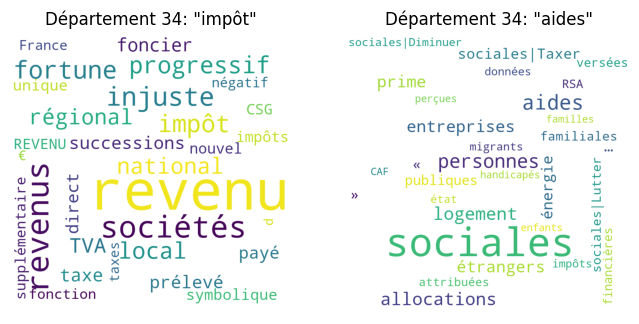

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Dictionnaire des fréquences de mots
# créer un nouveau dictionnaire avec les 25 premiers éléments
nouveau_dict = {}
nouveau_dict_aides = {}
i = 0
for elt in d_word:
    if i == 30:
        break
    else:
        nouveau_dict[elt] = d_word[elt]
    i +=1

j = 0
for elt in d_word_aides:
    if j == 30:
        break
    else:
        nouveau_dict_aides[elt] = d_word_aides[elt]
    j +=1
print(nouveau_dict_aides)

# Créer le premier nuage de points
wordcloud1 = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(nouveau_dict)

# Créer le deuxième nuage de points
wordcloud2 = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate_from_frequencies(nouveau_dict_aides)

# Créer une figure avec deux sous-graphiques côte à côte
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))

# Afficher le premier nuage de points sur le premier sous-graphique
ax1.imshow(wordcloud1)
ax1.set_title('Département 34: "impôt"')
ax1.axis('off')

# Afficher le deuxième nuage de points sur le deuxième sous-graphique
ax2.imshow(wordcloud2)
ax2.set_title('Département 34: "aides"')
ax2.axis('off')

# Afficher la figure avec les deux sous-graphiques côte à côte
plt.show()

In [ ]:
l = ["ddd","frfr"]
print(", ".join(l))
print(type(", ".join(l)))